# Figures

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
%config InlineBackend.figure_format ='retina'
from matplotlib.patches import Rectangle
from matplotlib import gridspec
import seaborn as sns

import re
import numpy as np
from collections import Counter
import pandas as pd
from scipy import interp
import scipy.stats as stats
from matplotlib.pylab import rcParams
from matplotlib import gridspec
from matplotlib_venn import venn2, venn2_circles

from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn import datasets
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import RandomForestClassifier
# from sklearn.preprocessing import Imputer
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import label_binarize
from sklearn.svm.libsvm import predict_proba
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.mixture import GaussianMixture
from scipy import cluster

from combat.pycombat import pycombat
import pickle

import time

import random
from math import log
import glob
import subprocess
import os
import sys
from adjustText import adjust_text
from sklearn.model_selection import KFold
import csv


/Users/dux2001/opt/anaconda3/envs/myPython3.7/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/Users/dux2001/opt/anaconda3/envs/myPython3.7/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.svm.libsvm module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.svm. Anything that cannot be imported from sklearn.svm is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
sampleFeature = pd.read_csv('../EX_0201_prostateSubtypePredict/orgn_sampleList_wPDX.txt', index_col=0, sep='\t', header=None)
sampleFeature.head(2)

,1,2,3,4,5,6,7,8,9
0,,,,,,,,,
22Rv1,AR_dependent,old,orgn,0.3,AR_dependent,Cell_lines,batch_a,22Rv1,AR_high
BM110,unknown,old,orgn,0.3,SCL,MSK_organoids,batch_a,MSKPCa18,AR_neg


In [83]:
sampleFeature['finalName'] = sampleFeature.index

In [84]:
sampleFeature.loc['BM110','finalName'] = 'MSKPCa18'
sampleFeature.loc['BM111','finalName'] = 'MSKPCa19'
sampleFeature.loc['ST262','finalName'] = 'MSKPCa20'
sampleFeature.loc['ST278','finalName'] = 'MSKPCa22'
sampleFeature.loc['ST280','finalName'] = 'MSKPCa24'
sampleFeature.loc['C4.2','finalName'] = 'C4-2'
sampleFeature['finalName'] = [x.replace('PM','WCM') if x.startswith('PM') else sampleFeature.loc[x,'finalName'] for x in sampleFeature.index]

In [85]:
sampleFeature['finalName'][34:] = ['PDX09a','PDX10a','PDX16a','PDX16b','PDX34a','PDX01a','PDX43a','PDX27a','PDX07b']

/Users/dux2001/opt/anaconda3/envs/myPython3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [86]:
set(sampleFeature[6])

{'Cell_lines', 'GSE118207', 'MSK_organoids', 'PDX', 'WCM_organoids'}

In [3]:
pradCols = {
    'AR_dependent':'#CF7A72',
    'NEPC':'#7EBCBF',
    'SCL':'#AC7EF3',
    'Wnt':'#92AA43',
    'WNT':'#92AA43',
    'Unknown':'grey',
    'unknown':'grey',
    'UNK':'grey',
    'new':'grey',
    'prad':'grey',
    'exp':'grey'
}

scCols = {
    1:'#CF7A72', #AR
    2:'#AC7EF3', #SCL
    3:'#7EBCBF', #NEPC
    4:'#92AA43', #WNT
    5:'#FFD479' # soemthing new
}

sourceCols = {
    'Cell_lines':'orange',
    'GSE118207':'brown',
    'MSK_organoids':'red',
    'PDX':'green',
    'WCM_organoids':'blue'
}

In [4]:
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.colors import ListedColormap
from matplotlib import cm
import scipy.spatial as sp, scipy.cluster.hierarchy as hc

ryb = cm.get_cmap('RdYlBu_r', 512)
n_ryb = ListedColormap(ryb(np.linspace(0.22, 0.92, 128)))


In [89]:
cmap = ListedColormap(ryb(np.linspace(0.15, 1, 128)))

In [ ]:
def fySweep(v):
    v_mean = np.median(v)
    return pd.Series(map(lambda x: x-v_mean, v))

In [ ]:
topVar_selected = pd.read_csv('rlog_ave_topVar_drop3pdx.csv', index_col=0)

# clsuter to be consistent with consensus clustering using euclidean
pItemSelected = rlog.loc[topVar_selected.index,:]
Z = hc.linkage(pItemSelected.transpose(), metric='euclidean', method='ward', optimal_ordering = False)
linkage = Z

# # Pearson distance to show in figure
corr_dist = pItemSelected.apply(fySweep, axis=1).corr(method='pearson')

corr_dist.index = pItemSelected.columns
corr_dist.columns = pItemSelected.columns

plotDF = corr_dist

In [97]:
plotDF['label'] = sampleFeature.loc[plotDF.index,5]
plotDF['label2'] = sampleFeature.loc[plotDF.index,6]
finalNameList = sampleFeature.loc[plotDF.index,'finalName'].tolist()
plotDF.index = finalNameList
plotDF.columns = finalNameList+['label','label2']
# plotDF.reindex(columns=plotDF.index)
# plotDF

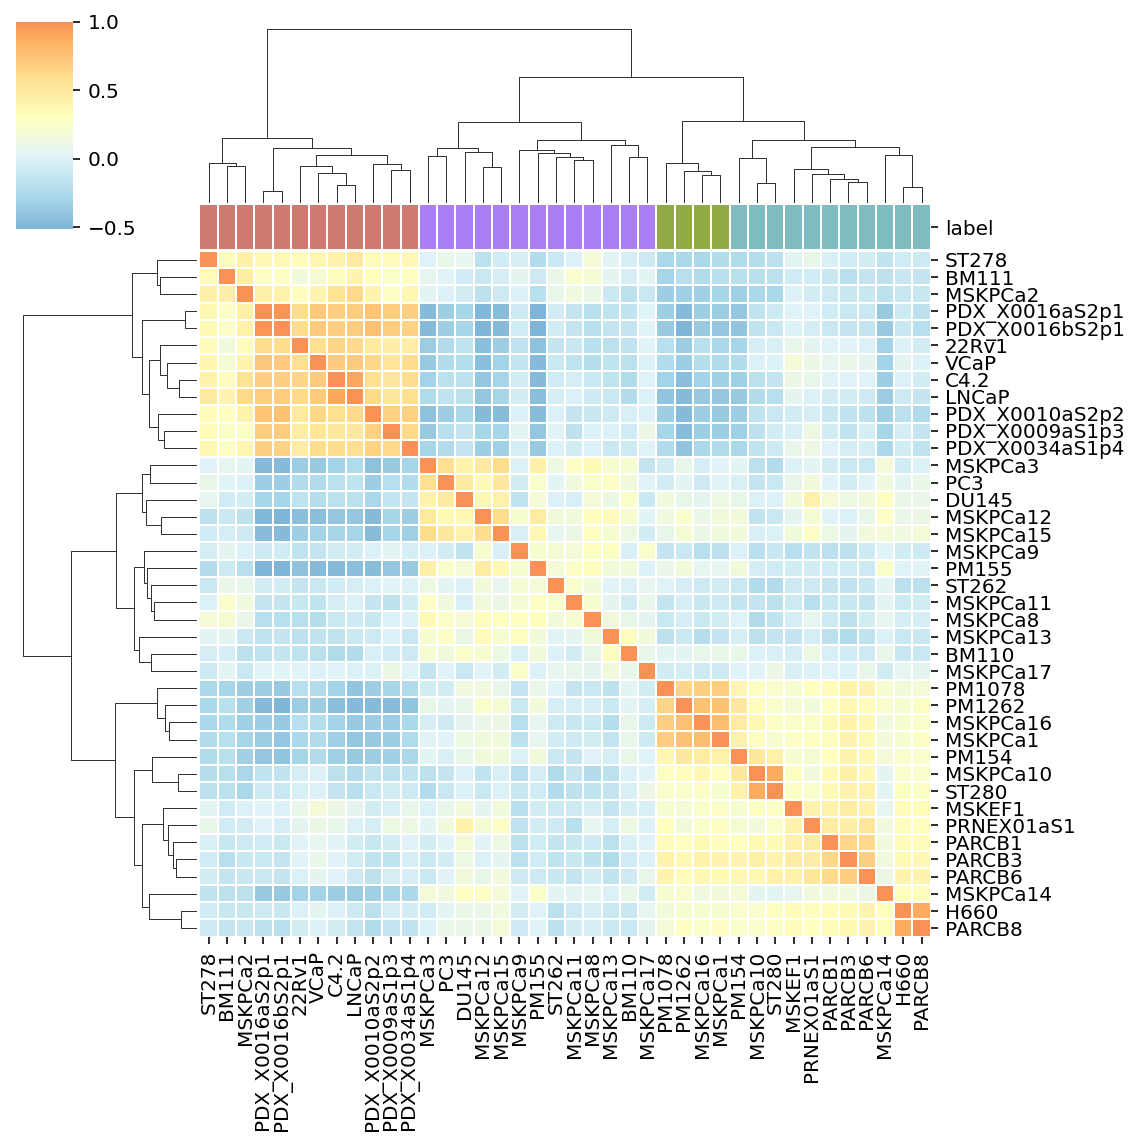

In [51]:
Z = hc.linkage(pItemSelected.transpose(), metric='euclidean', method='ward', optimal_ordering = False)
linkage = Z

hm = sns.clustermap(plotDF.iloc[:,:-2], center=0.5, cmap=cmap, linewidths=0.2, figsize=(8,8), method='ward',
                   col_colors=plotDF['label'].map(pradCols),colors_ratio=0.05,yticklabels=True,
                    xticklabels=True, row_linkage=linkage, col_linkage=linkage)


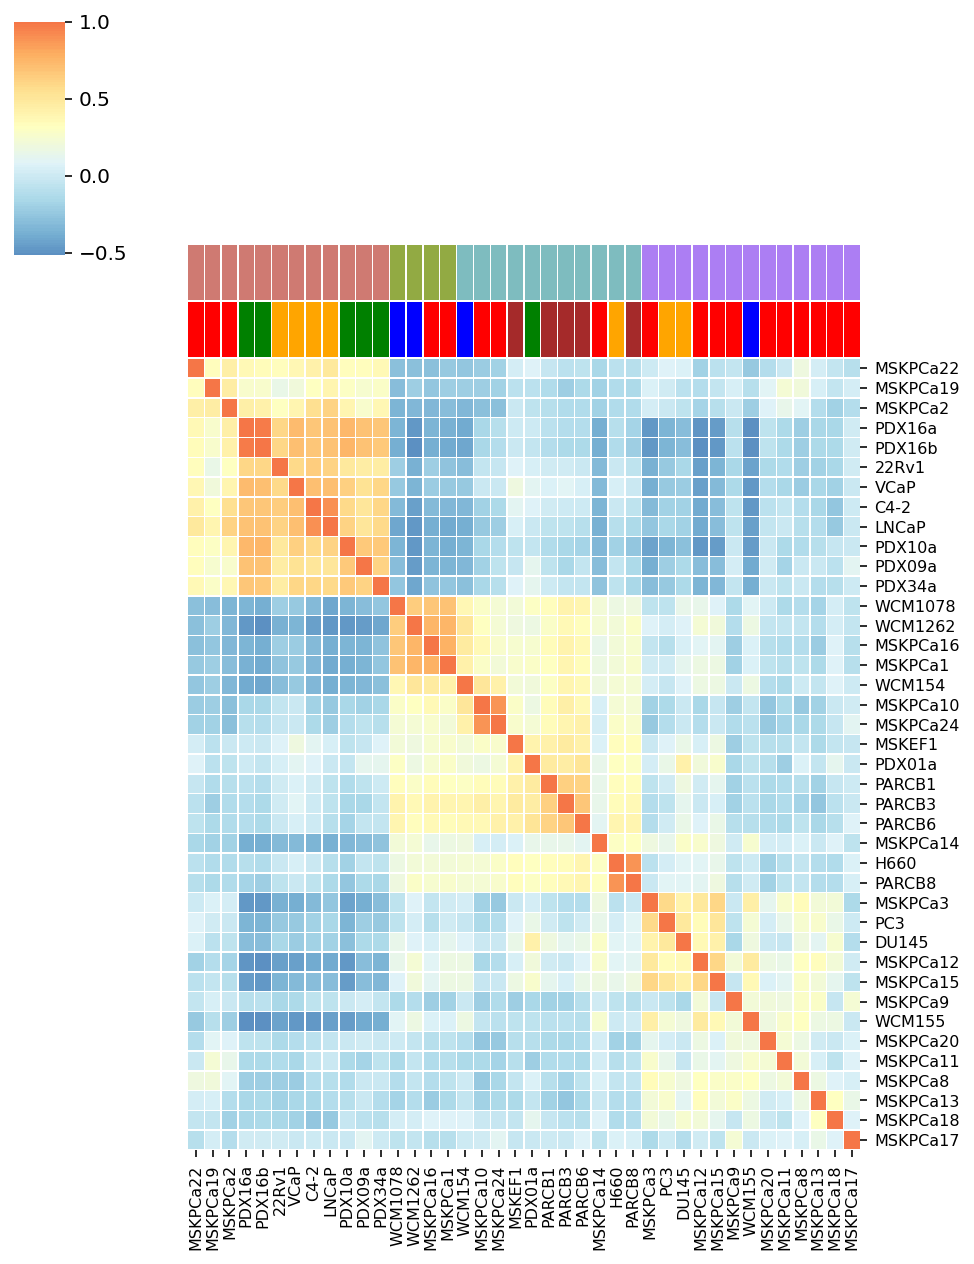

In [102]:
# to switch the branch order
reorderSampleList = ['MSKPCa22', 'MSKPCa19', 'MSKPCa2', 'PDX16a', 'PDX16b', '22Rv1', 'VCaP', 'C4-2', 'LNCaP', 'PDX10a', 'PDX09a', 'PDX34a', 'WCM1078', 'WCM1262', 'MSKPCa16', 'MSKPCa1', 'WCM154', 'MSKPCa10', 'MSKPCa24', 'MSKEF1', 'PDX01a', 'PARCB1', 'PARCB3', 'PARCB6', 'MSKPCa14', 'H660', 'PARCB8', 'MSKPCa3', 'PC3', 'DU145', 'MSKPCa12', 'MSKPCa15', 'MSKPCa9', 'WCM155', 'MSKPCa20', 'MSKPCa11', 'MSKPCa8', 'MSKPCa13', 'MSKPCa18', 'MSKPCa17']

hm = sns.clustermap(plotDF.loc[reorderSampleList,reorderSampleList], center=0.5, cmap=cmap, linewidths=0.2, figsize=(7,9), method='ward',metric='euclidean',
                   col_colors=[plotDF.loc[reorderSampleList,'label'].map(pradCols), plotDF.loc[reorderSampleList,'label2'].map(sourceCols)],colors_ratio=0.05,yticklabels=True,
                    xticklabels=True, row_cluster=False, col_cluster=False)

hm.ax_heatmap.set_xticklabels(hm.ax_heatmap.get_xmajorticklabels(), fontsize=8)
hm.ax_heatmap.set_yticklabels(hm.ax_heatmap.get_ymajorticklabels(), fontsize=8)

plt.savefig('figure1/figure1e.pdf', dpi=300)
plt.show();

# Figure 1b

In [553]:
table = pd.read_csv('Sample_database.csv',index_col=0)
table.head(2)

,Sample ID,Official Sample Name,Type,Mutation Count,Fraction Genome Altered
Patient ID,,,,,
p_C_MX45TM,s_C_MX45TM_G002_d,MSK-PCa18,Organoid,7,0.5959
P-0026447,P-0026447-T01-IM6,MSK-PCa18,Tumor,5,0.5202


In [554]:
set(table['Official Sample Name'])

{'MSK-PCa18',
 'MSK-PCa19',
 'MSK-PCa20',
 'MSK-Pca10',
 'MSK-Pca11',
 'MSK-Pca12',
 'MSK-Pca13',
 'MSK-Pca14',
 'MSK-Pca8',
 'MSK-Pca9'}

In [555]:
markerDic = {'MSK-PCa18':'o',
 'MSK-PCa19':'v',
 'MSK-PCa20':'^',
 'MSK-Pca10':'s',
 'MSK-Pca11':'p',
 'MSK-Pca12':'P',
 'MSK-Pca13':'*',
 'MSK-Pca14':'h',
 'MSK-Pca8':'D',
 'MSK-Pca9':'X'}

typeCol = {
    'Organoid':'dodgerblue',
    'Tumor':'orange'
}

In [556]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

subtypeLegend = []
for eachType in set(table['Official Sample Name']):
    subtypeLegend.append(Line2D([0], [0], marker=markerDic[eachType], markerfacecolor='black', label=eachType, color='w', markersize=8, alpha=0.8))

/Users/dux2001/opt/anaconda3/envs/myPython3.7/lib/python3.7/site-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Unrecognized location 'left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  del sys.path[0]


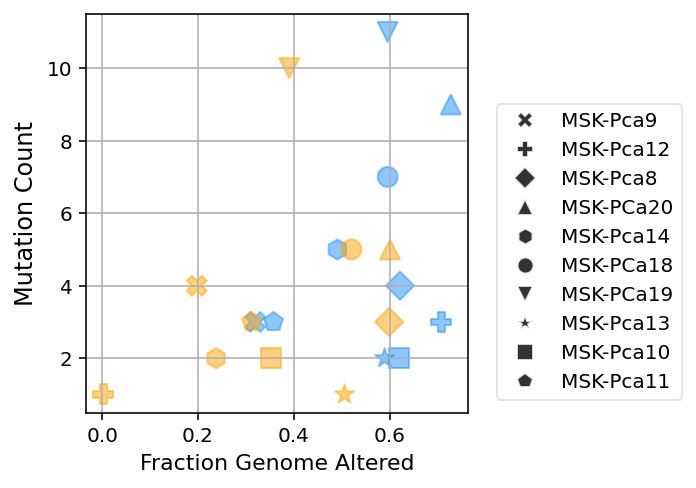

In [560]:
plt.close("all")
plt.figure(figsize=(5,3.5))

for eachType in set(table['Official Sample Name']):
    
    plotDF = table[table['Official Sample Name'] == eachType]
    plt.scatter(x=plotDF['Fraction Genome Altered'], y=plotDF['Mutation Count'], color=plotDF['Type'].map(typeCol),
           marker=markerDic[eachType], s=100, alpha=0.5)

plt.xlabel('Fraction Genome Altered', fontsize=11)
plt.ylabel('Mutation Count', fontsize=12)

plt.legend(handles=subtypeLegend, bbox_to_anchor=(1.05,0.8),framealpha=0.5, loc='left')
plt.tight_layout()
plt.grid(True)
plt.savefig('figure1/figure_1b.pdf', dpi=400)
plt.show();

# Figure S12A/B

In [7]:
data = pd.read_csv('../EX_0208_prostateRnaCluster/PNAS_su2c/data_mutations_mskcc.txt', sep='\t')
data.head(2)

/Users/dux2001/opt/anaconda3/envs/myPython3.7/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3051: DtypeWarning: Columns (4) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Hugo_Symbol,Entrez_Gene_Id,Center,NCBI_Build,Chromosome,Start_Position,End_Position,Strand,Consequence,Variant_Classification,...,n_alt_count,HGVSc,HGVSp,HGVSp_Short,Transcript_ID,RefSeq,Protein_position,Codons,Hotspot,tag
0,AGRN,375790.0,broad.mit.edu,GRCh37,1,984385,984385,+,missense_variant,Missense_Mutation,...,NaN,ENST00000379370.2:c.4244C>T,p.Ala1415Val,p.A1415V,ENST00000379370,NM_198576.3,1415.0,gCc/gTc,0.0,AGRN SI_9157_Tumor Missense_Mutation p.A1415V
1,SH2D5,400745.0,broad.mit.edu,GRCh37,1,21050192,21050192,+,missense_variant,Missense_Mutation,...,NaN,ENST00000444387.2:c.835G>A,p.Gly279Ser,p.G279S,ENST00000444387,NM_001103161.1,279.0,Ggt/Agt,0.0,SH2D5 SI_9157_Tumor Missense_Mutation p.G279S


In [8]:
data.columns

Index(['Hugo_Symbol', 'Entrez_Gene_Id', 'Center', 'NCBI_Build', 'Chromosome',
       'Start_Position', 'End_Position', 'Strand', 'Consequence',
       'Variant_Classification', 'Variant_Type', 'Reference_Allele',
       'Tumor_Seq_Allele1', 'Tumor_Seq_Allele2', 'dbSNP_RS',
       'dbSNP_Val_Status', 'Tumor_Sample_Barcode',
       'Matched_Norm_Sample_Barcode', 'Match_Norm_Seq_Allele1',
       'Match_Norm_Seq_Allele2', 'Tumor_Validation_Allele1',
       'Tumor_Validation_Allele2', 'Match_Norm_Validation_Allele1',
       'Match_Norm_Validation_Allele2', 'Verification_Status',
       'Validation_Status', 'Mutation_Status', 'Sequencing_Phase',
       'Sequence_Source', 'Validation_Method', 'Score', 'BAM_File',
       'Sequencer', 't_ref_count', 't_alt_count', 'n_ref_count', 'n_alt_count',
       'HGVSc', 'HGVSp', 'HGVSp_Short', 'Transcript_ID', 'RefSeq',
       'Protein_position', 'Codons', 'Hotspot', 'tag'],
      dtype='object')

In [83]:
data[['Hugo_Symbol','Variant_Classification','Variant_Type','Tumor_Sample_Barcode']].head(2)

,Hugo_Symbol,Variant_Classification,Variant_Type,Tumor_Sample_Barcode
0,AGRN,Missense_Mutation,SNP,SI_9157_Tumor
1,SH2D5,Missense_Mutation,SNP,SI_9157_Tumor


In [5]:
vcDict = {"3'Flank": '',
 "5'UTR": '',
 'Frame_Shift_Del': 'trunc',
 'Frame_Shift_Ins': 'trunc',
 'In_Frame_Del' : 'Inframe',
 'In_Frame_Ins' : 'Inframe',
 'Intron' : '',
 'Missense_Mutation': 'misSense',
 'Nonsense_Mutation': 'trunc',
 'RNA' : '',
 'Silent' : '',
 'Splice_Site': 'trunc',
 'DeepDel' :'DeepDel',
 'AMP':'AMP',
 '':''}

vcDict_mut = {"3'Flank": '',
 "3'UTR":'',
 "5'Flank":'',
 "5'UTR": '',
 'IGR':'',
 'Frame_Shift_Del': 'mutation',
 'Frame_Shift_Ins': 'mutation',
 'In_Frame_Del' : 'mutation',
 'In_Frame_Ins' : 'mutation',
 'Intron' : '',
 'Missense_Mutation': 'mutation',
 'Nonsense_Mutation': 'mutation',
 'Nonstop_Mutation':'mutation',
 'RNA' : '',
 'Silent' : '',
 'Splice_Site': 'mutation',
 'Splice_Region':'mutation',
 'DeepDel' :'DeepDel',
 'AMP':'AMP',
 'Translation_Start_Site':'',
 '':''}

In [16]:
data_i = pd.read_csv('../EX_0208_prostateRnaCluster/PNAS_su2c/data_CNA.txt', sep='\t', index_col=0)
data_i.shape
data_i.head(2)

(22058, 444)

,SI_9157_Tumor,DFCI.11-104.02-Tumor,DFCI.11-104.13-Tumor,MO_1008-Tumor_Dura,MO_1012-Tumor-Subcutaneous_nodule,MO_1013-Tumor,MO_1014-Tumor,MO_1015-Tumor,MO_1020-Tumor,MO_1040-Tumor,...,WCM662_Z2,WCM663_Z1,WCM664_X1,WCM665_X1,WCM666_X1,WCM668_Z1,WCM688_Z7,WCM886_Z2,WCM89_X1,WCM91_Z1
Hugo_Symbol,,,,,,,,,,,,,,,,,,,,,
DEC1,0,0,1,0,0,1,0,0,0,0,...,0.0,2.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0
MARCH1,0,0,1,0,-1,0,1,0,0,0,...,1.0,1.0,1.0,1.0,1.0,-1.0,0.0,-2.0,1.0,-1.0


In [60]:
data_i = data_i.loc[~data_i.index.duplicated(keep='first')]
data_i = data_i.fillna(0)
data_i.shape

(17318, 444)

In [179]:
data_i.loc[['APC','CTNNB1','ZNRF3','TCF7L2','RSPO2'],'SC_9100-Tumor']

Hugo_Symbol
APC       0
CTNNB1    0
ZNRF3     0
TCF7L2    0
RSPO2     0
Name: SC_9100-Tumor, dtype: int64

In [77]:
data_i_df = pd.DataFrame(columns=['Hugo_Symbol','Variant_Classification','Variant_Type','Tumor_Sample_Barcode'])

In [78]:
patient = 'SI_9157_Tumor'
test = data_i['SI_9157_Tumor']
# test
pd.Series(test[test > 1].index + ',AMP,CNV,'+patient).str.split(',', expand = True).head(2)


,0,1,2,3
0,A4GNT,AMP,CNV,SI_9157_Tumor
1,AACS,AMP,CNV,SI_9157_Tumor


In [80]:
# pd.Series(data_ii[data_ii < -1].index + ',DeepDel,CNV,'+patient).str.split(',', expand = True)

In [81]:
for patient in data_i.columns:
#     print(patient)
    data_ii = data_i[patient]
    
    tmp_i = pd.Series(data_ii[data_ii > 1].index + ',AMP,CNV,'+patient).str.split(',', expand = True) 
    try:
        tmp_i.columns = data_i_df.columns
        data_i_df = pd.concat([data_i_df,tmp_i], axis=0)
    except ValueError:
        continue
        
    tmp_i = pd.Series(data_ii[data_ii < -1].index + ',DeepDel,CNV,'+patient).str.split(',', expand = True) 
    try:
        tmp_i.columns = data_i_df.columns
        data_i_df = pd.concat([data_i_df,tmp_i], axis=0)
    except ValueError:
        continue

In [84]:
data_i_df.head(2)

,Hugo_Symbol,Variant_Classification,Variant_Type,Tumor_Sample_Barcode
0,A4GNT,AMP,CNV,SI_9157_Tumor
1,AACS,AMP,CNV,SI_9157_Tumor


In [89]:
data_comb = pd.concat([data[['Hugo_Symbol','Variant_Classification','Variant_Type','Tumor_Sample_Barcode']], data_i_df], axis=0)
data_comb.head(2)

,Hugo_Symbol,Variant_Classification,Variant_Type,Tumor_Sample_Barcode
0,AGRN,Missense_Mutation,SNP,SI_9157_Tumor
1,SH2D5,Missense_Mutation,SNP,SI_9157_Tumor


In [90]:
data_comb.shape

(389268, 4)

In [93]:
newIndex = pd.MultiIndex.from_frame(data_comb[['Hugo_Symbol','Tumor_Sample_Barcode']])

data_comb = data_comb.set_index(newIndex)
data_comb.head(2)

,,Hugo_Symbol,Variant_Classification,Variant_Type,Tumor_Sample_Barcode
Hugo_Symbol,Tumor_Sample_Barcode,,,,
AGRN,SI_9157_Tumor,AGRN,Missense_Mutation,SNP,SI_9157_Tumor
SH2D5,SI_9157_Tumor,SH2D5,Missense_Mutation,SNP,SI_9157_Tumor


In [190]:
data_comb.to_csv('../EX_0208_prostateRnaCluster/PNAS_su2c/allSample_cna_mut.csv')

In [177]:
data_comb[data_comb['Tumor_Sample_Barcode'] == 'SC_9100-Tumor'].to_csv('../EX_0208_prostateRnaCluster/PNAS_su2c/sc_9100_tumor.csv')

In [146]:
# set(data_comb['Variant_Classification'])

In [181]:
plotGeneList = ['AR','TP53','RB1','PTEN','FOXA1','ZBTB16','NCOR1','NCOR2','AKT1','PIK3CB','PIK3CA','PIK3R1','BRAF','RAF1','KRAS','HRAS','APC','CTNNB1','ANRF3','RNF43','ZNRF3','TCF7L2','RSPO2','RSPO3','AXIN1','AXIN2','HDAC2','CDK12','MSH2','MLH1','PMS2','BRCA2','BRCA1','PALB2','RAD51B','RAD51C','ATM','ATR','FANCA','MRE11A','CDKN1B','CDKN2A','CCND1','ZFHX3','KMT2C','KMT2D','KDM6A','CHD1','SPOP']


In [119]:
# data_comb.loc[(gene,sample),]

In [156]:
data_comb.loc['AR','PROS10448P28-SU2C.01115016-Tumor-SM-42W9D']

/Users/dux2001/opt/anaconda3/envs/myPython3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


,,Hugo_Symbol,Variant_Classification,Variant_Type,Tumor_Sample_Barcode
Hugo_Symbol,Tumor_Sample_Barcode,,,,
AR,PROS10448P28-SU2C.01115016-Tumor-SM-42W9D,AR,AMP,CNV,PROS10448P28-SU2C.01115016-Tumor-SM-42W9D


In [182]:
transformed = pd.DataFrame([],columns=set(data_comb['Tumor_Sample_Barcode']), index=plotGeneList)

# transformed

for gene in transformed.index:
    for sample in transformed.columns:
        try:
            df_i = data_comb.loc[(gene,sample),]
            if pd.isnull(transformed.loc[gene, sample]):
                transformed.loc[gene, sample] = []
                vc = df_i['Variant_Classification'].values.tolist()
                vc = map(vcDict_mut.get, vc)
                
                transformed.loc[gene, sample] += vc
            else:
                vc = df_i['Variant_Classification'].values.tolist()
                vc = map(vcDict_mut.get, vc)
                transformed.loc[gene, sample] += vc
        except KeyError:
            continue

/Users/dux2001/opt/anaconda3/envs/myPython3.7/lib/python3.7/site-packages/pandas/core/indexing.py:873: PerformanceWarning: indexing past lexsort depth may impact performance.
  return self._getitem_tuple(key)


In [145]:
data_comb.loc[('ATM','SC_9183_T')]
transformed.loc['ATM','SC_9183_T']
# transformed

/Users/dux2001/opt/anaconda3/envs/myPython3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


Hugo_Symbol Variant_Classification  \
Hugo_Symbol Tumor_Sample_Barcode                                      
ATM         SC_9183_T                    ATM      Missense_Mutation   
            SC_9183_T                    ATM          Splice_Region   

                                 Variant_Type Tumor_Sample_Barcode  
Hugo_Symbol Tumor_Sample_Barcode                                    
ATM         SC_9183_T                     SNP            SC_9183_T  
            SC_9183_T                     DEL            SC_9183_T

['mutation', 'mutation']

In [185]:
for gene in transformed.index:
    for sample in transformed.columns:
        
        try:
            if pd.isnull(transformed.loc[gene,sample]):
                continue
            else:
                transformed.loc[gene, sample] = ';'.join(list(set(transformed.loc[gene, sample]))).strip(';')
        except:
#             print(gene, sample)
            transformed.loc[gene, sample] = ';'.join(list(set(transformed.loc[gene, sample]))).strip(';')
            continue

In [186]:
transformed.head(2)

,PROS01448-6115233-Tumor-SM-67ERW,SC_9089-TM,PROS10448P28-SU2C.01115016-Tumor-SM-42W9D,PROS11496-6115317-Tumor-SM-6CNQ2,TP_2096_T,SC_9011-Tumor,MO_1510_T,SC_9010-Tumor,PROS01448-DFCI.10-448.P42-Tumor-SM-5CQ55,SC_9033_T,...,SC_9046-Tumor,SC_9065-TM-Tumor2,SC_9039-Tumor,WCM664_X1,PROS01448-DFCI.10-448.P29-Tumor-SM-5CQ4U,PROS10448-SUTC.01115085-Tumor-SM-4JC6J,PM172-TM,SC_9091-TM,PRAD-6115392.0-Tumor-SM-B2XRZ,TP_2054-TM
AR,NaN,NaN,AMP,NaN,AMP,mutation,AMP,AMP,NaN,NaN,...,mutation;AMP,mutation,NaN,NaN,mutation,AMP,NaN,AMP,NaN,
TP53,NaN,NaN,NaN,mutation,mutation,NaN,NaN,NaN,NaN,NaN,...,mutation,mutation,NaN,NaN,NaN,NaN,NaN,mutation,mutation,NaN


In [187]:
# transformed.to_csv('../EX_0208_prostateRnaCluster/PNAS_su2c/transformedOrignalAnnot_su2c.csv')
# transformed.to_csv('../EX_0208_prostateRnaCluster/PNAS_su2c/transformed_su2c.csv')
transformed.to_csv('../EX_0208_prostateRnaCluster/PNAS_su2c/transformed_su2c_addZNRF3.csv')

In [188]:
# metaData = pd.read_csv('../EX_0208_prostateRnaCluster/PNAS_su2c/data_clinical_sample.txt', index_col=0, sep="\t", skiprows=4)
# metaData.to_csv('../EX_0208_prostateRnaCluster/PNAS_su2c/data_clinical_sample.csv')

# Figure 4D

In [398]:
data_comb = pd.read_csv('../EX_0208_prostateRnaCluster/PNAS_su2c/allSample_cna_mut.csv', index_col=[0,1])
data_comb.shape
data_comb.head(2)

(389268, 4)

,,Hugo_Symbol.1,Variant_Classification,Variant_Type,Tumor_Sample_Barcode.1
Hugo_Symbol,Tumor_Sample_Barcode,,,,
AGRN,SI_9157_Tumor,AGRN,Missense_Mutation,SNP,SI_9157_Tumor
SH2D5,SI_9157_Tumor,SH2D5,Missense_Mutation,SNP,SI_9157_Tumor


In [395]:
# ntpLabel = pd.read_csv('../EX_0208_prostateRnaCluster/ericaSigGene_ntpPrediction_su2cPatients_noPDX_noBatch.csv', index_col=0)
ntpLabel = pd.read_csv('../EX_0208_prostateRnaCluster/template_byTop/RES_rankBy_baseMean_top93_su2c.csv', index_col=0)
ntpLabel.index = [x.replace('_Aligned_TPM','') for x in ntpLabel.index]
ntpLabel.tail(2)

,prediction,d.AR_dependent,d.NEPC,d.SCL,d.WNT,p.value,FDR
WCM665_X1,NEPC,0.804993,0.551022,0.796610,0.653905,0.001000,0.001785
WCM666_X1,AR_dependent,0.709782,0.734912,0.769702,0.710635,0.986014,1.000000


In [396]:
for sample in ntpLabel.index:
    if float(ntpLabel.loc[sample, 'FDR']) >= 0.5:
#         print (sample)
        ntpLabel.loc[sample, 'prediction'] = 'unknown'
    elif float(ntpLabel.loc[sample, 'p.value']) >= 0.05:
#         print (sample)
        ntpLabel.loc[sample, 'prediction'] = 'unknown'

In [397]:
len(ntpLabel[ntpLabel['prediction'] != 'unknown'].index)

206

In [399]:
data_comb['Tumor_Sample_Barcode.1'].values

array(['SI_9157_Tumor', 'SI_9157_Tumor', 'SI_9157_Tumor', ..., 'WCM91_Z1',
       'WCM91_Z1', 'WCM91_Z1'], dtype=object)

In [400]:
'SC_9100.Tumor' in ntpLabel.index
'SC_9100-Tumor' in data_comb['Tumor_Sample_Barcode.1'].values

True

True

In [90]:
su2c_rName = pd.read_csv('../EX_0208_prostateRnaCluster/su2c_rName.csv', index_col=0)
su2c_rName.index = su2c_rName['su2c_rNames']
su2c_rName.head(2)

,su2c_rNames,Unnamed: 2
su2c_rNames,,
DFCI.11.104.02.Tumor,DFCI.11.104.02.Tumor,DFCI.11-104.02-Tumor
DFCI.11.104.13.Tumor,DFCI.11.104.13.Tumor,DFCI.11-104.13-Tumor


In [402]:
ntpLabel.index = su2c_rName.loc[ntpLabel.index,'Unnamed: 2']

In [405]:
# wnt_sigName = ['APC','CTNNB1','RNF43','ZNRF3','TCF7L2','RSPO2','HDAC2']
wnt_sigName = ['APC','CTNNB1','ZNRF3','TCF7L2','RSPO2']

In [447]:
# select_gt = data_comb.loc[('AR', ntpLabel.index),]
# select_gt = data_comb.loc[(wnt_sigName, ntpLabel.index),]
select_gt = data_comb.loc[('RB1', ntpLabel.index),]
select_gt.head(2)

Hugo_Symbol.1  \
Hugo_Symbol Tumor_Sample_Barcode                          
RB1         PRAD-6115393.0-Tumor-SM-7LGUF           RB1   
            MO_1556_T                               RB1   

                                          Variant_Classification Variant_Type  \
Hugo_Symbol Tumor_Sample_Barcode                                                
RB1         PRAD-6115393.0-Tumor-SM-7LGUF      Nonsense_Mutation          SNP   
            MO_1556_T                          Missense_Mutation          SNP   

                                                  Tumor_Sample_Barcode.1  
Hugo_Symbol Tumor_Sample_Barcode                                          
RB1         PRAD-6115393.0-Tumor-SM-7LGUF  PRAD-6115393.0-Tumor-SM-7LGUF  
            MO_1556_T                                          MO_1556_T

In [448]:
select_gt['Variant_Classification'] = [vcDict_mut[vc] for vc in select_gt['Variant_Classification'].values]

/Users/dux2001/opt/anaconda3/envs/myPython3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [449]:
# #AR
# select_gt = select_gt[(select_gt['Variant_Classification'] == 'mutation') | (select_gt['Variant_Classification'] == 'AMP')]

# #WNT
# select_gt = select_gt[(select_gt['Variant_Classification'] == 'mutation')]

# NEPC
select_gt = select_gt[(select_gt['Variant_Classification'] == 'DeepDel')]


select_gt_patient = list(set(select_gt['Tumor_Sample_Barcode.1']))
# select_gt

In [450]:
# select_gt_ntpPatient = ntpLabel[ntpLabel['prediction'] == 'AR_dependent'].index.tolist()
# select_gt_ntpOtherPatient = ntpLabel[(ntpLabel['prediction'] != 'AR_dependent')&(ntpLabel['prediction'] != 'unknown')].index.tolist()

# select_gt_ntpPatient = ntpLabel[ntpLabel['prediction'] == 'WNT'].index.tolist()
# select_gt_ntpOtherPatient = ntpLabel[(ntpLabel['prediction'] != 'WNT')&(ntpLabel['prediction'] != 'unknown')].index.tolist()

select_gt_ntpPatient = ntpLabel[ntpLabel['prediction'] == 'NEPC'].index.tolist()
select_gt_ntpOtherPatient = ntpLabel[(ntpLabel['prediction'] != 'NEPC')&(ntpLabel['prediction'] != 'unknown')].index.tolist()


In [451]:
len(select_gt_ntpPatient), len(select_gt_ntpOtherPatient)
len(select_gt_patient)

ol_1 = len(set(select_gt_patient)&set(select_gt_ntpPatient))
ol_2 = len(set(select_gt_patient)&set(select_gt_ntpOtherPatient))

ol_1, ol_2

(26, 180)

25

(9, 11)

In [452]:
stats.fisher_exact([[ol_1, len(select_gt_ntpPatient)-ol_1],[ol_2, len(select_gt_ntpOtherPatient)-ol_2]], alternative='two-sided')
pValue = stats.fisher_exact([[ol_1, len(select_gt_ntpPatient)-ol_1],[ol_2, len(select_gt_ntpOtherPatient)-ol_2]], alternative='greater')[1]

"{:.3}".format(pValue)

(8.133689839572192, 0.00013743726801039585)

'0.000137'

In [391]:
# pradCols_highSat = pradCols
# pradCols_highSat['AR_dependent'] = '#EB6E6A'
# pradCols_highSat['NEPC'] = '#4AC0C6'
# pradCols_highSat['SCL'] = '#BF75FF'
# pradCols_highSat['WNT'] = '#7CB700'

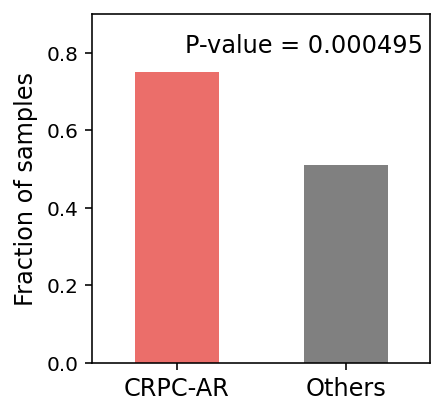

In [435]:
plt.close("all")
plt.figure(figsize=(3.2,3))

pValue = stats.fisher_exact([[ol_1, len(select_gt_ntpPatient)-ol_1],[ol_2, len(select_gt_ntpOtherPatient)-ol_2]], alternative='two-sided')[1]

plt.bar(['CRPC-AR','Others'], [ol_1/len(select_gt_ntpPatient), ol_2/len(select_gt_ntpOtherPatient)], width=0.5, color=['#EB6E6A','#808080'])
plt.text(0.05,0.8,'P-value = '+"{:.3}".format(pValue), fontsize=12)

plt.xlim(-0.5,1.5)
plt.ylim(0,0.9)
plt.ylabel('Fraction of samples', fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
# plt.savefig('figure4/figure_4d_ar.pdf', dpi=400)
plt.savefig('figure4/figure_4d_ar_top93.pdf', dpi=400)
plt.show();

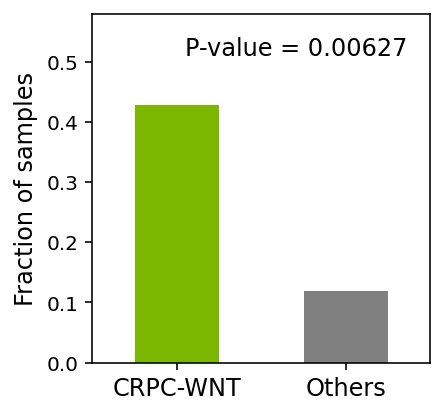

In [415]:
plt.close("all")
plt.figure(figsize=(3.2,3))

pValue = stats.fisher_exact([[ol_1, len(select_gt_ntpPatient)-ol_1],[ol_2, len(select_gt_ntpOtherPatient)-ol_2]], alternative='two-sided')[1]

plt.bar(['CRPC-WNT','Others'], [ol_1/len(select_gt_ntpPatient), ol_2/len(select_gt_ntpOtherPatient)], width=0.5, color=['#7CB700','#808080'])
plt.text(0.05,0.51,'P-value = '+"{:.3}".format(pValue), fontsize=12)

plt.xlim(-0.5,1.5)
plt.ylim(0,0.58)
plt.ylabel('Fraction of samples', fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
plt.savefig('figure4/figure_4d_wnt_top93.pdf', dpi=400)
plt.show();

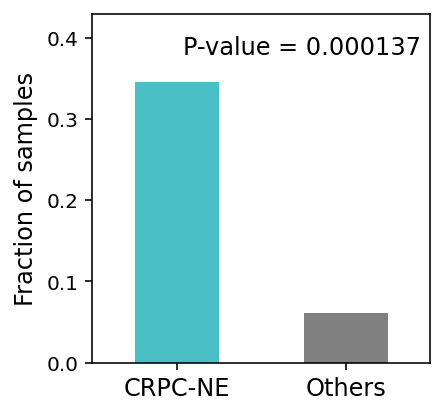

In [457]:
plt.close("all")
plt.figure(figsize=(3.2,3))

pValue = stats.fisher_exact([[ol_1, len(select_gt_ntpPatient)-ol_1],[ol_2, len(select_gt_ntpOtherPatient)-ol_2]], alternative='two-sided')[1]

plt.bar(['CRPC-NE','Others'], [ol_1/len(select_gt_ntpPatient), ol_2/len(select_gt_ntpOtherPatient)], width=0.5, color=['#4AC0C6','#808080'])
plt.text(0.035,0.38,'P-value = '+"{:.3}".format(pValue), fontsize=12)

plt.xlim(-0.5,1.5)
plt.ylim(0,0.43)
plt.ylabel('Fraction of samples', fontsize=12)
plt.xticks(fontsize=12)

plt.tight_layout()
# plt.savefig('figure4/figure_4d_nepc.pdf', dpi=400)
plt.savefig('figure4/figure_4d_nepc_top93.pdf', dpi=400)
plt.show();

# figure S12C

In [416]:
ntpLabel.index

Index(['TP_2077_Tumor', 'TP_2078_Tumor', 'SC_9056_T', 'SC_9137_Tumor',
       'SC_9139_Tumor', 'SC_9140_Tumor', 'SC_9142_Tumor', 'MO_1469_T',
       'TP_2081_T', 'SC_9074_T',
       ...
       'WCM210_Z2', 'WCM209_Z2', 'WCM335_X1', 'WCM258_Z2', 'WCM252_Z3',
       'WCM89_X1', 'WCM393_Z3', 'WCM573_X1', 'WCM665_X1', 'WCM666_X1'],
      dtype='object', name='Unnamed: 2', length=266)

In [417]:
all_gene = list(set(data_comb['Hugo_Symbol.1']))

In [418]:
select_gt = data_comb.loc[(all_gene,ntpLabel.index),]

In [419]:
select_gt['Variant_Classification'] = [vcDict_mut[vc] for vc in select_gt['Variant_Classification'].values]
select_gt = select_gt[(select_gt['Variant_Classification'] == 'mutation')]

/Users/dux2001/opt/anaconda3/envs/myPython3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [420]:
select_gt

Hugo_Symbol.1  \
Hugo_Symbol Tumor_Sample_Barcode                              
ADM         SC_9126_Tumor                               ADM   
FOXA3       MO_1176-Tumor                             FOXA3   
            SC_9097-TM                                FOXA3   
            PROS01448-6115233-Tumor-SM-67ERW          FOXA3   
ASXL3       SC_9056_T                                 ASXL3   
...                                                     ...   
GALNTL5     SC_9163_Tumor                           GALNTL5   
            PROS10448-01115200-Tumor-SM-7LYLF       GALNTL5   
FGF12       SC_9017-Tumor                             FGF12   
            SC_9124_Tumor                             FGF12   
            PROS01448-6115219-Tumor-SM-67ERS          FGF12   

                                              Variant_Classification  \
Hugo_Symbol Tumor_Sample_Barcode                                       
ADM         SC_9126_Tumor                                   mutation   
FOXA3       MO_1176-Tumor                                   mutation   
            SC_9097-TM                                      mutation   
            PROS01448-6115233-Tumor-SM-67ERW                mutation   
ASXL3       SC_9056_T                                       mutation   
...                                                              ...   
GALNTL5     SC_9163_Tumor                                   mutation   
            PROS10448-01115200-Tumor-SM-7LYLF               mutation   
FGF12       SC_9017-Tumor                                   mutation   
            SC_9124_Tumor                                   mutation   
            PROS01448-6115219-Tumor-SM-67ERS                mutation   

                                              Variant_Type  \
Hugo_Symbol Tumor_Sample_Barcode                             
ADM         SC_9126_Tumor                              SNP   
FOXA3       MO_1176-Tumor                              SNP   
            SC_9097-TM                                 SNP   
            PROS01448-6115233-Tumor-SM-67ERW           SNP   
ASXL3       SC_9056_T                                  INS   
...                                                    ...   
GALNTL5     SC_9163_Tumor                              DEL   
            PROS10448-01115200-Tumor-SM-7LYLF          SNP   
FGF12       SC_9017-Tumor                              SNP   
            SC_9124_Tumor                              SNP   
            PROS01448-6115219-Tumor-SM-67ERS           SNP   

                                                          Tumor_Sample_Barcode.1  
Hugo_Symbol Tumor_Sample_Barcode                                                  
ADM         SC_9126_Tumor                                          SC_9126_Tumor  
FOXA3       MO_1176-Tumor                                          MO_1176-Tumor  
            SC_9097-TM                                                SC_9097-TM  
            PROS01448-6115233-Tumor-SM-67ERW    PROS01448-6115233-Tumor-SM-67ERW  
ASXL3       SC_9056_T                                                  SC_9056_T  
...                                                                          ...  
GALNTL5     SC_9163_Tumor                                          SC_9163_Tumor  
            PROS10448-01115200-Tumor-SM-7LYLF  PROS10448-01115200-Tumor-SM-7LYLF  
FGF12       SC_9017-Tumor                                          SC_9017-Tumor  
            SC_9124_Tumor                                          SC_9124_Tumor  
            PROS01448-6115219-Tumor-SM-67ERS    PROS01448-6115219-Tumor-SM-67ERS  

[25322 rows x 4 columns]

In [421]:
ar_sample = ntpLabel[ntpLabel['prediction'] == 'AR_dependent'].index.tolist()
wnt_sample = ntpLabel[ntpLabel['prediction'] == 'WNT'].index.tolist()
nepc_sample = ntpLabel[ntpLabel['prediction'] == 'NEPC'].index.tolist()
scl_sample = ntpLabel[ntpLabel['prediction'] == 'SCL'].index.tolist()

In [422]:
len(set(select_gt[select_gt['Tumor_Sample_Barcode.1'] == 'SC_9163_Tumor']['Hugo_Symbol.1']))

1035

In [423]:
len(select_gt[select_gt['Tumor_Sample_Barcode.1'] == 'SC_9163_Tumor'])

1101

In [424]:
ar_count = []
for patient in ar_sample:
    cnt_i = len(select_gt[select_gt['Tumor_Sample_Barcode.1'] == patient])
    ar_count.append(np.log2(cnt_i))

wnt_count = []
for patient in wnt_sample:
    cnt_i = len(select_gt[select_gt['Tumor_Sample_Barcode.1'] == patient])
    wnt_count.append(np.log2(cnt_i))

nepc_count = []
for patient in nepc_sample:
    cnt_i = len(select_gt[select_gt['Tumor_Sample_Barcode.1'] == patient])
    nepc_count.append(np.log2(cnt_i))
    
scl_count = []
for patient in scl_sample:
    cnt_i = len(select_gt[select_gt['Tumor_Sample_Barcode.1'] == patient])
    scl_count.append(np.log2(cnt_i))

In [10]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['caps'], color=color)
    plt.setp(bp['medians'], color='red')

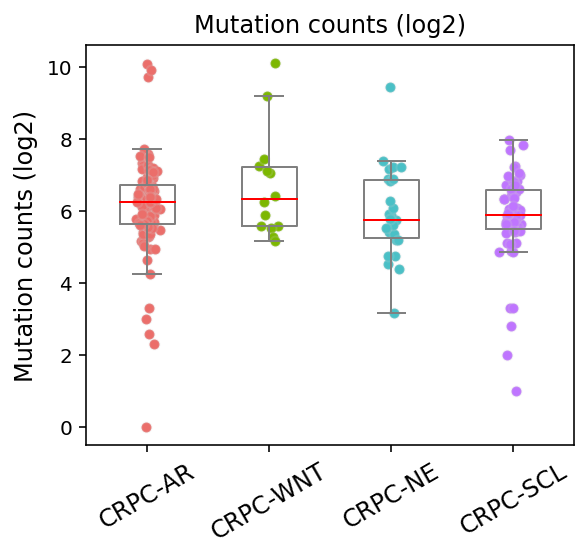

In [427]:
plt.close("all")
plt.figure(figsize=(4.2,4))


for i,d in enumerate([ar_count, wnt_count, nepc_count, scl_count]):
    y = d
    x = np.random.normal(i+1, 0.04, len(y))
    plt.plot(x, y, mfc = ["#EB6E6A",'#7CB700','#4AC0C6','#BF75FF'][i], mec='#D3D3D330', ms=5, marker="o", linestyle="None")

    
bx = plt.boxplot([ar_count, wnt_count, nepc_count, scl_count], showfliers=True, flierprops={'marker':'None', 'color':'None'},
                labels = ['CRPC-AR','CRPC-WNT','CRPC-NE','CRPC-SCL'])

set_box_color(bx, 'grey')

# plt.xlim(-0.5,1.5)
# plt.ylim(0,0.35)
plt.title('Mutation counts (log2)')
plt.ylabel('Mutation counts (log2)', fontsize=12)
plt.xticks(fontsize=12, rotation=30)

plt.tight_layout()
# plt.savefig('figure4/figure_s12c_mutCount.pdf', dpi=400)
plt.savefig('figure4/figure_s12c_mutCount_top93.pdf', dpi=400)
plt.show();

# Figure S13, 23

In [195]:
# patient_exp = pd.read_csv('../EX_0201_prostateSubtypePredict/in_house_patients/IPM_patient_RSEM_combine3MSK.csv', index_col=0)
patient_exp = pd.read_csv('../EX_0208_prostateRnaCluster/su2c_rnaseq_geneNameRevised_noPDX_noBatch_266Sample_new.csv', index_col=0)
# patient_exp = pd.read_csv('../EX_0201_prostateSubtypePredict/in_house_patients/data_mRNA_seq_fpkm_polya_rmDup_reivsed.csv', index_col=0)

patient_exp.columns = [x.replace('_Aligned_TPM','') for x in patient_exp.columns]
patient_exp.index = [x.split('.')[0] for x in patient_exp.index]
patient_exp.head(2)

patient_exp = np.log2(patient_exp+1)

,TP_2077_Tumor,TP_2078_Tumor,SC_9056_T,SC_9137_Tumor,SC_9139_Tumor,SC_9140_Tumor,SC_9142_Tumor,MO_1469_T,TP_2081_T,SC_9074_T,...,WCM210_Z2,WCM209_Z2,WCM335_X1,WCM258_Z2,WCM252_Z3,WCM89_X1,WCM393_Z3,WCM573_X1,WCM665_X1,WCM666_X1
A1BG,1.191379,0.496139,0.782425,2.655721,3.436719,6.394917,7.737387,4.764024,1.303435,1.212498,...,1.047402,2.683947,0.979354,0.664136,53.679623,1.209215,1.341221,12.942821,12.977479,3.508555
A1CF,0.018454,0.019613,0.527011,0.014175,0.022547,0.068104,0.054634,0.051738,0.432815,0.153201,...,0.211117,0.013109,0.073233,0.015486,2.600308,0.198950,0.031614,0.020294,3.393404,0.519557


In [196]:
patient_exp.head(2)
# patient_exp.iloc[:,0:2].apply(stats.zscore, axis=0)

,TP_2077_Tumor,TP_2078_Tumor,SC_9056_T,SC_9137_Tumor,SC_9139_Tumor,SC_9140_Tumor,SC_9142_Tumor,MO_1469_T,TP_2081_T,SC_9074_T,...,WCM210_Z2,WCM209_Z2,WCM335_X1,WCM258_Z2,WCM252_Z3,WCM89_X1,WCM393_Z3,WCM573_X1,WCM665_X1,WCM666_X1
A1BG,0.674180,0.319698,0.476343,1.219005,1.442736,2.069516,2.283535,1.757882,0.723967,0.683696,...,0.607580,1.227725,0.575000,0.413668,4.799078,0.682221,0.740375,2.901381,2.904723,1.461674
A1CF,0.013251,0.014079,0.337432,0.010189,0.016173,0.048309,0.038882,0.036846,0.282627,0.106483,...,0.144776,0.009425,0.051883,0.011128,1.201730,0.136815,0.022626,0.014565,1.431196,0.333170


In [76]:
'ENSG00000169083' in patient_exp.index # AR
'ENSG00000168646' in patient_exp.index # AXIN2
'ENSG00000102003' in patient_exp.index # SYP
'ENSG00000026508' in patient_exp.index # CD44
'ENSG00000018408' in patient_exp.index # WWTR1
'YAP1' in patient_exp.index # YAP1
'ENSG00000142871' in patient_exp.index # CYR61
'ENSG00000167601' in patient_exp.index # AXL
'ENSG00000129474' in patient_exp.index # AJUBA

True

True

True

True

True

True

True

True

True

In [183]:
# patient_ntpLabel = pd.read_csv('../EX_0208_prostateRnaCluster/ericaSigGene_ntpPrediction_ipmPatients_top93_wSignalScore.csv', index_col=0)
patient_ntpLabel = pd.read_csv('../EX_0208_prostateRnaCluster/ericaSigGene_ntpPrediction_su2cPatients_top93_wSignalScore.csv', index_col=0)
patient_ntpLabel.index = [x.replace('_Aligned_TPM','') for x in patient_ntpLabel.index]

patient_exp.index = [x.replace('_Aligned_TPM','') for x in patient_exp.index]
patient_ntpLabel.shape
# Counter(patient_ntpLabel['ntpLabel'])
# Counter(patient_ntpLabel['predicted'])
# patient_ntpLabel = patient_ntpLabel.iloc[:-3,]
patient_ntpLabel.tail(4)

(266, 13)

,prediction,d.AR_dependent,d.NEPC,d.SCL,d.WNT,p.value,FDR,AR_score,WNT_score,NEPC_score,SCL_score,YAP_TAZ_score,basal_score
WCM393_Z3,AR_dependent,0.596435,0.736603,0.783374,0.698224,0.001000,0.001785,36.621947,10.149072,-18.858338,-118.515397,-4.306693,-35.076847
WCM573_X1,NEPC,0.812856,0.535649,0.813854,0.699075,0.001000,0.001785,-8.489684,16.059639,11.938303,-3.630561,-2.704342,-22.567141
WCM665_X1,NEPC,0.804993,0.551022,0.796610,0.653905,0.001000,0.001785,2.170600,10.571553,17.897036,80.508337,3.341803,-6.062332
WCM666_X1,AR_dependent,0.709782,0.734912,0.769702,0.710635,0.986014,1.000000,20.776042,18.965002,-14.923413,58.986096,-0.632658,-8.652078


In [523]:
# patient_ntpLabel = patient_ntpLabel[patient_ntpLabel['predicted'] == patient_ntpLabel['ntpLabel']]
# patient_ntpLabel.shape
# Counter(patient_ntpLabel['ntpLabel'])

In [184]:
# patient_ntpLabel = pd.read_csv('../EX_0201_prostateSubtypePredict/in_house_patients/IPM_Patient_classification_combine3MSK.csv', index_col=0)
# patient_ntpLabel = pd.read_csv('../EX_0201_prostateSubtypePredict/in_house_patients/SU2C_patient_classification.csv', index_col=0)

patient_ntpLabel.head(2)
patient_ntpLabel.shape
# Counter(patient_ntpLabel['prediction'])
# Counter(patient_ntpLabel['ntp_group'])

,prediction,d.AR_dependent,d.NEPC,d.SCL,d.WNT,p.value,FDR,AR_score,WNT_score,NEPC_score,SCL_score,YAP_TAZ_score,basal_score
TP_2077_Tumor,AR_dependent,0.597492,0.709256,0.757183,0.740269,0.001,0.001785,30.490445,20.686757,-16.348596,2.936520,1.604441,-13.050894
TP_2078_Tumor,AR_dependent,0.651858,0.751901,0.711616,0.765919,0.001,0.001785,22.412014,15.736687,-18.341649,-57.226643,-3.879107,-22.883880


(266, 13)

In [1101]:
# newLabel = []
# for x in patient_ntpLabel['prediction']:
#     if x.endswith('AR'):
#         newLabel.append('AR_dependent')
#     elif  x.endswith('WNT'):
#         newLabel.append('WNT')
#     elif  x.endswith('SCL'):
#         newLabel.append('SCL')
#     elif  x.endswith('NEPC'):
#         newLabel.append('NEPC')
#     elif  x.endswith('unknown'):
#         newLabel.append('unknown')
        
# patient_ntpLabel['prediction'] = newLabel

In [1368]:
# patient_ntpLabel = patient_ntpLabel.rename(columns={'prediction':'ntpLabel'})
# patient_ntpLabel = patient_ntpLabel.rename(index={'PM159_Z31':'PM159_Z31_1_Ctrl_RNASeq'})
# patient_ntpLabel = patient_ntpLabel.loc[patient_exp.columns,]
# patient_ntpLabel.tail(2)

,AR_dependent,NEPC,SCL,WNT,predicted,ntpLabel,ntp_pvalue,ntp_FDR
MSKPCa6T,0.052035,0.055456,0.843036,0.049473,SCL,SCL,0.001,0.00125
MSKPCa7T,0.679039,0.080703,0.102408,0.137850,AR_dependent,AR_dependent,0.001,0.00125


In [1105]:
# for x in patient_ntpLabel.index:
#     if not x in patient_exp.columns:
#         print(x)

In [185]:
su2c_rName.head(2)
len(set(patient_ntpLabel.index)&set(patient_exp.columns))
len(set(patient_ntpLabel.index)&set(su2c_rName.index))
len(set(patient_exp.columns)&set(su2c_rName['Unnamed: 2']))

,su2c_rNames,Unnamed: 2
su2c_rNames,,
DFCI.11.104.02.Tumor,DFCI.11.104.02.Tumor,DFCI.11-104.02-Tumor
DFCI.11.104.13.Tumor,DFCI.11.104.13.Tumor,DFCI.11-104.13-Tumor


69

266

266

In [186]:
patient_ntpLabel.index = su2c_rName.loc[patient_ntpLabel.index,'Unnamed: 2']
len(set(patient_ntpLabel.index)&set(patient_exp.columns))

266

In [192]:
min(patient_exp.loc['ENSG00000169083',patient_ntpLabel.index])

0.018878823364650427

In [538]:
select_gene_dict = {
    'ENSG00000169083':'AR',
    'ENSG00000168646':'AXIN2',
    'ENSG00000102003':'SYP',
    'ENSG00000026508':'CD44',
    'ENSG00000018408':'WWTR1(TAZ)',
    'ENSG00000137693':'YAP1',
    'YAP1':'YAP1',
    'ENSG00000142871':'CYR61',
    'ENSG00000167601':'AXL',
    'ENSG00000129474':'AJUBA'
}

In [527]:
# IPM
select_gene_list = ['ENSG00000169083','ENSG00000168646','ENSG00000102003','ENSG00000026508','ENSG00000018408','ENSG00000137693','ENSG00000142871','ENSG00000167601','ENSG00000129474']
len(select_gene_list)

9

In [539]:
# SU2C
select_gene_list = ['ENSG00000169083','ENSG00000168646','ENSG00000102003','ENSG00000026508','ENSG00000018408','YAP1','ENSG00000142871','ENSG00000167601','ENSG00000129474']
len(select_gene_list)

9

In [540]:
ar_sample = patient_ntpLabel[patient_ntpLabel['ntpLabel'] == 'AR_dependent'].index
wnt_sample = patient_ntpLabel[patient_ntpLabel['ntpLabel'] == 'WNT'].index
ne_sample = patient_ntpLabel[patient_ntpLabel['ntpLabel'] == 'NEPC'].index
scl_sample = patient_ntpLabel[patient_ntpLabel['ntpLabel'] == 'SCL'].index

In [942]:
# ar_sample in patient_exp.columns

In [22]:
# ax.text([1],[max(ar_count)+max(ar_count)*0.1],'****',color='black')

0.9314737165645136
0.906786994699318
0.9900373907627568
1.7403043931118606e-05
1.5302764211173398e-09
0.00016111412732341425
6.474239833334442e-12
9.65908255028433e-13
2.0269966698682832e-10


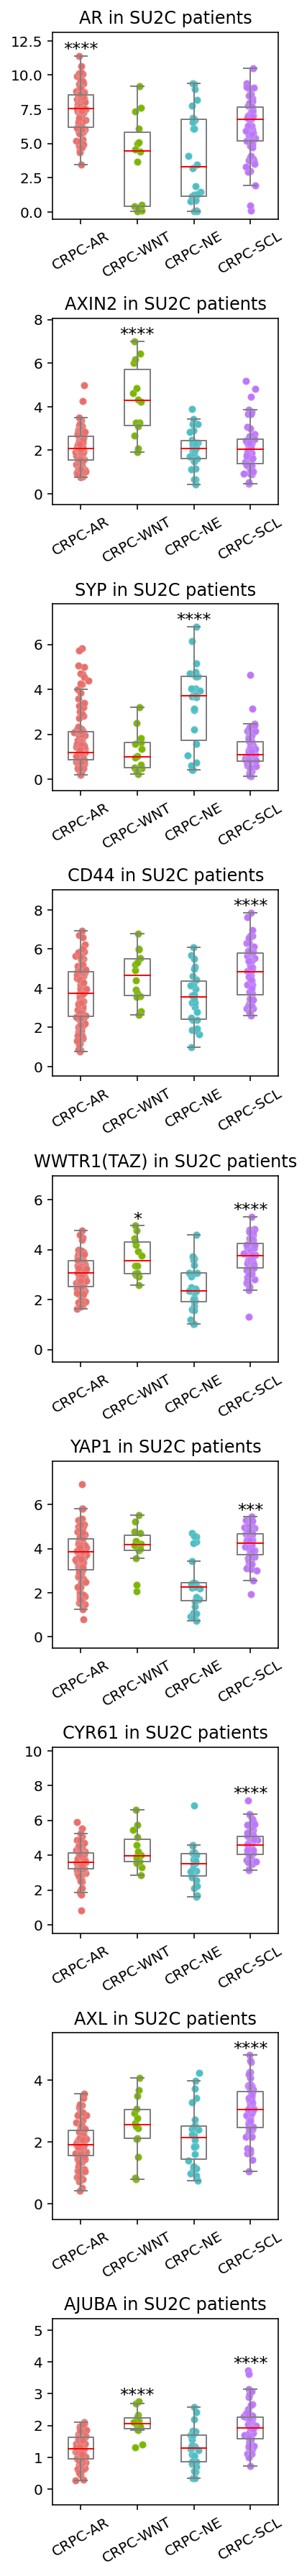

In [543]:
plt.figure(figsize=(3,25))

for j in range(0, len(select_gene_list)):
    ax = plt.subplot(9,1,j+1)
    
    sel_gene = select_gene_list[j]
    
    ar_count = patient_exp.loc[sel_gene, ar_sample]
    wnt_count = patient_exp.loc[sel_gene, wnt_sample]
    nepc_count = patient_exp.loc[sel_gene, ne_sample]
    scl_count = patient_exp.loc[sel_gene, scl_sample]
    
    for i,d in enumerate([ar_count, wnt_count, nepc_count, scl_count]):
        y = d
        x = np.random.normal(i+1, 0.04, len(y))
        ax.plot(x, y, mfc = ["#EB6E6A",'#7CB700','#4AC0C6','#BF75FF'][i], mec='#D3D3D330', ms=5, marker="o", linestyle="None")


    bx = ax.boxplot([ar_count, wnt_count, nepc_count, scl_count], showfliers=True, flierprops={'marker':'None', 'color':'None'},
                    labels = ['CRPC-AR','CRPC-WNT','CRPC-NE','CRPC-SCL'])

    set_box_color(bx, 'grey')
    
    p1 = stats.mannwhitneyu(ar_count, pd.concat([nepc_count,wnt_count,scl_count]), alternative='greater')[1]
    if p1 < 0.0001:
        ax.text(1,max(ar_count)*1.01,'****',color='black', ha='center', fontsize=12)
    elif p1 < 0.001:
        ax.text(1,max(ar_count)*1.01,'***',color='black', ha='center', fontsize=12)        
    elif p1 < 0.01:
        ax.text(1,max(ar_count)*1.01,'**',color='black', ha='center', fontsize=12)        
    elif p1 <= 0.05:
        ax.text(1,max(ar_count)*1.01,'*',color='black', ha='center', fontsize=12)        

    
    p2 = stats.mannwhitneyu(wnt_count, pd.concat([nepc_count,ar_count,scl_count]), alternative='greater')[1]
    if p2 < 0.0001:
        ax.text(2,max(wnt_count)*1.01,'****',color='black', ha='center', fontsize=12)
    elif p2 < 0.001:
        ax.text(2,max(wnt_count)*1.01,'***',color='black', ha='center', fontsize=12)        
    elif p2 < 0.01:
        ax.text(2,max(wnt_count)*1.01,'**',color='black', ha='center', fontsize=12)        
    elif p2 <= 0.05:
        ax.text(2,max(wnt_count)*1.01,'*',color='black', ha='center', fontsize=12)        

        
    p3 = stats.mannwhitneyu(nepc_count, pd.concat([ar_count,wnt_count,scl_count]), alternative='greater')[1]
    if p3 < 0.0001:
        ax.text(3,max(nepc_count)*1.01,'****',color='black', ha='center', fontsize=12)
    elif p3 < 0.001:
        ax.text(3,max(nepc_count)*1.01,'***',color='black', ha='center', fontsize=12)        
    elif p3 < 0.01:
        ax.text(3,max(nepc_count)*1.01,'**',color='black', ha='center', fontsize=12)        
    elif p3 <= 0.05:
        ax.text(3,max(nepc_count)*1.01,'*',color='black', ha='center', fontsize=12)        

        
        
    p4 = stats.mannwhitneyu(scl_count, pd.concat([nepc_count,wnt_count,ar_count]), alternative='greater')[1]
    if p4 < 0.0001:
        ax.text(4,max(scl_count)*1.01,'****',color='black', ha='center', fontsize=12)
    elif p4 < 0.001:
        ax.text(4,max(scl_count)*1.01,'***',color='black', ha='center', fontsize=12)        
    elif p4 < 0.01:
        ax.text(4,max(scl_count)*1.01,'**',color='black', ha='center', fontsize=12)        
    elif p4 <= 0.05:
        ax.text(4,max(scl_count)*1.01,'*',color='black', ha='center', fontsize=12)        

    
    print(p4)
    
#     ax.set_title(select_gene_dict[sel_gene]+' in WCM patients', fontsize=12)
    ax.set_title(select_gene_dict[sel_gene]+' in SU2C patients', fontsize=12)
    
    ax.set_ylim(-0.5,max(patient_exp.loc[sel_gene,:]*1.15))
#     ax.set_ylabel('Gene expression log2(TPM+1)', fontsize=12)
    ax.set_xticklabels(['CRPC-AR','CRPC-WNT','CRPC-NE','CRPC-SCL'], fontsize=10, rotation=30)

plt.tight_layout()

# plt.savefig('figure4/figure_s13b_2_ipm_mann_top93.pdf', dpi=400)
plt.savefig('figure4/figure_s13b_1_su2c_mann_top93.pdf', dpi=400)

#### Archived
# plt.savefig('figure4/figure_s13b_1_su2c.pdf', dpi=400)
# plt.savefig('figure4/figure_s13b_1_su2c_ttest.pdf', dpi=400)
# plt.savefig('figure4/figure_s13b_1_su2c_ttest_wPermu.pdf', dpi=400)
# plt.savefig('figure4/figure_s13b_2_ipm_mann_confiAssign.pdf', dpi=400)
# plt.savefig('figure4/figure_s13b_1_su2c_mann_confiAssign.pdf', dpi=400)

# plt.savefig('figure4/figure_s13b_2_ipm_ttest.pdf', dpi=400)
# plt.savefig('figure4/figure_s13b_2_ipm_ttest_wPermu.pdf', dpi=400)

plt.show();

In [977]:
# 'CYR61','CTGF','AMOTL2','ANKRD1','IGFBP3','F3','FJX1','NUAK2','LAST2','CRIM1','GADD45A','TGFB2','PTPN14','NTSE','FOXF2','AXL','DOCK5','ASAP1','RBMS3','MYOF','ANHGEF17','CCDC80','AJUBA'

In [1007]:
select_gene_dict2 = {
'ENSG00000018408':'WWTR1(TAZ)',
'ENSG00000137693':'YAP1',
'ENSG00000142871':'CYR61',
'ENSG00000118523':'CTGF',
'ENSG00000114019':'AMOTL2',
'ENSG00000148677':'ANKRD1',
'ENSG00000146674':'IGFBP3',
'ENSG00000117525':'F3',
'ENSG00000179431':'FJX1',
'ENSG00000163545':'NUAK2',
'ENSG00000150938':'CRIM1',
'ENSG00000116717':'GADD45A',
'ENSG00000092969':'TGFB2',
'ENSG00000152104':'PTPN14',
'ENSG00000137273':'FOXF2',
'ENSG00000167601':'AXL',
'ENSG00000147459':'DOCK5',
'ENSG00000153317':'ASAP1',
'ENSG00000144642':'RBMS3',
'ENSG00000138119':'MYOF',
'ENSG00000091986':'CCDC80',
'ENSG00000129474':'AJUBA'
    }

In [1008]:
select_gene_list2=list(select_gene_dict2.keys())

# Figure S13a, S23b/e, Signal score

In [165]:
patient_ntpLabel = pd.read_csv('../EX_0208_prostateRnaCluster/ericaSigGene_ntpPrediction_ipmPatients_top93_wSignalScore.csv', index_col=0)
# patient_ntpLabel = pd.read_csv('../EX_0208_prostateRnaCluster/ericaSigGene_ntpPrediction_su2cPatients_top93_wSignalScore.csv', index_col=0)

patient_ntpLabel.index = [x.replace('_Aligned_TPM','') for x in patient_ntpLabel.index]
patient_ntpLabel.shape
patient_ntpLabel.tail(4)

(100, 13)

,prediction,d.AR_dependent,d.NEPC,d.SCL,d.WNT,p.value,FDR,AR_score,WNT_score,NEPC_score,SCL_score,YAP_TAZ_score,basal_score
T5,NEPC,0.784603,0.552541,0.814729,0.702112,0.001,0.001389,15.640719,49.257745,54.156392,349.690194,12.713742,16.836815
MSKPCa2T,AR_dependent,0.536291,0.709712,0.702073,0.716382,0.001,0.001389,52.241056,40.569608,-0.498647,208.543218,4.933727,1.678260
MSKPCa6T,SCL,0.759688,0.715832,0.514746,0.680943,0.001,0.001389,23.412460,48.387985,1.304628,534.403125,27.688813,82.795197
MSKPCa7T,AR_dependent,0.538808,0.792868,0.711345,0.704384,0.001,0.001389,57.682305,34.508594,-4.009870,235.745434,14.082328,16.626161


In [166]:
for sample in patient_ntpLabel.index:
    if float(patient_ntpLabel.loc[sample, 'FDR']) >= 0.5:
#         print (sample)
        patient_ntpLabel.loc[sample, 'prediction'] = 'unknown'
    elif float(patient_ntpLabel.loc[sample, 'p.value']) >= 0.05:
#         print (sample)
        patient_ntpLabel.loc[sample, 'prediction'] = 'unknown'

In [169]:
ar_sample = patient_ntpLabel[patient_ntpLabel['prediction'] == 'AR_dependent'].index
wnt_sample = patient_ntpLabel[patient_ntpLabel['prediction'] == 'WNT'].index
ne_sample = patient_ntpLabel[patient_ntpLabel['prediction'] == 'NEPC'].index
scl_sample = patient_ntpLabel[patient_ntpLabel['prediction'] == 'SCL'].index

In [170]:
patient_ntpLabel.shape

(100, 13)

0 1 0.00017774266811494026
0 2 5.175100099690855e-11
0 3 8.532899419073735e-08
1 0 9.874592673052236e-06
1 2 5.698005698005698e-05
1 3 0.0001367053998632946
2 0 1.8750177671177208e-10
2 1 0.0006837606837606838
2 3 1.2208227671329583e-07
3 0 0.0003379938420631249
3 1 0.9410799726589201
3 1  not significant
3 2 0.010037966785941614


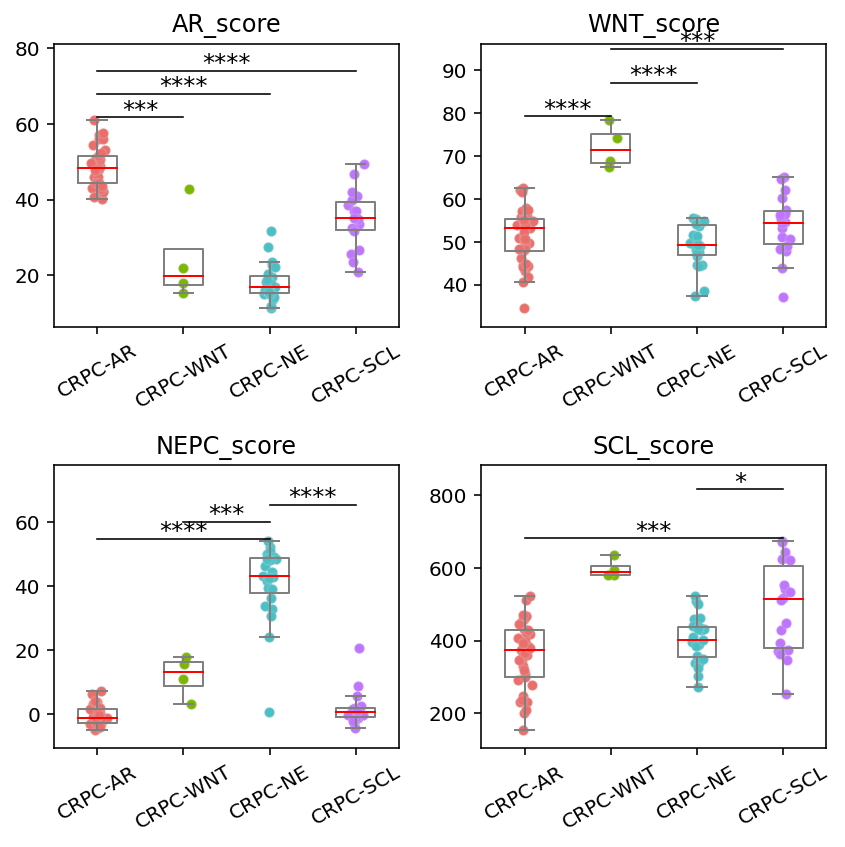

In [48]:
plt.figure(figsize=(6,6))

for j in range(0, len(['AR_score','WNT_score','NEPC_score','SCL_score'])):
    ax = plt.subplot(2,2,j+1)
    
    sel_gene = ['AR_score','WNT_score','NEPC_score','SCL_score'][j]
    
    ar_count = patient_ntpLabel.loc[ar_sample, sel_gene]
    wnt_count = patient_ntpLabel.loc[wnt_sample, sel_gene]
    nepc_count = patient_ntpLabel.loc[ne_sample, sel_gene]
    scl_count = patient_ntpLabel.loc[scl_sample, sel_gene]
    
    for i,d in enumerate([ar_count, wnt_count, nepc_count, scl_count]):
        y = d
        x = np.random.normal(i+1, 0.04, len(y))
        ax.plot(x, y, mfc = ["#EB6E6A",'#7CB700','#4AC0C6','#BF75FF'][i], mec='#D3D3D330', ms=5, marker="o", linestyle="None")


    bx = ax.boxplot([ar_count, wnt_count, nepc_count, scl_count], showfliers=True, flierprops={'marker':'None', 'color':'None'},
                    labels = ['CRPC-AR','CRPC-WNT','CRPC-NE','CRPC-SCL'])

    set_box_color(bx, 'grey')
    
    countList = [ar_count, wnt_count, nepc_count, scl_count]
    for a in [0,1,2,3]:
        cnt_list = [0,1,2,3]
        cnt_list.remove(a)
        
        if j == a:
            
            test_cnt = countList[a]
            asterisk_height = max(test_cnt)*1.01
            asterisk_cnt = 0
            
            for b in cnt_list:

                other_cnt = countList[b]
                asterisk_height = max(test_cnt)*(1.01+0.1*asterisk_cnt)
                
                p1 = stats.mannwhitneyu(test_cnt, other_cnt, alternative='greater')[1]
                print(a,b, p1)
                if p1 < 0.0001:
                    ax.text((a+b+2)/2.0,asterisk_height,'****',color='black', ha='center', fontsize=12)
                    ax.plot([a+1,b+1],[asterisk_height]*2,'-',color='black', linewidth=0.8)
                elif p1 < 0.001:
                    ax.text((a+b+2)/2.0,asterisk_height,'***',color='black', ha='center', fontsize=12)
                    ax.plot([a+1,b+1],[asterisk_height]*2,'-',color='black', linewidth=0.8)
                elif p1 < 0.01:
                    ax.text((a+b+2)/2.0,asterisk_height,'**',color='black', ha='center', fontsize=12) 
                    ax.plot([a+1,b+1],[asterisk_height]*2,'-',color='black', linewidth=0.8)
                elif p1 < 0.05:
                    ax.text((a+b+2)/2.0,asterisk_height,'*',color='black', ha='center', fontsize=12)
                    ax.plot([a+1,b+1],[asterisk_height]*2,'-',color='black', linewidth=0.8)
                else:
                    print(a,b, ' not significant')
                    
                asterisk_cnt+=1
    
    ax.set_title(sel_gene, fontsize=12)
    ylim_range = max(patient_ntpLabel.loc[:,sel_gene])-min(patient_ntpLabel.loc[:,sel_gene])
    ax.set_ylim(min(patient_ntpLabel.loc[:,sel_gene])-ylim_range*0.1,max(patient_ntpLabel.loc[:,sel_gene])+ylim_range*0.4)
    ax.set_xticklabels(['CRPC-AR','CRPC-WNT','CRPC-NE','CRPC-SCL'], fontsize=10, rotation=30)
    
    
plt.tight_layout()
# plt.savefig('figure4/figure_s13a_2_ipm_mann_top93.pdf')
# plt.savefig('figure4/figure_s13a_2_ipm_ttest_confiAssign.pdf')

# plt.savefig('figure4/figure_s13a_1_su2c_mann_top93.pdf')
# plt.savefig('figure4/figure_s13a_1_su2c_ttest_confiAssign.pdf')
# plt.savefig('figure4/figure_s13a_1_su2c_mann_confiAssign.pdf')

# plt.savefig('figure4/figure_s13a_1_promote_mann_top93.pdf')

plt.show();

In [33]:
patient_ntpLabel.shape

(266, 13)

# Figure S2C, D, E, I

In [5]:
qc = pd.read_csv('Table_S4_ATACseq_QC.csv', index_col=0)
qc.head(5)

,total_readcounts,aligned_reads,mt_removed_reads (final reads),final_reads_percentage,NRF,PBC1,PBC2,TSS_enrichment,FriP,IDR_peaks,source
sample_name,,,,,,,,,,,
22Rv1_rep1,50048828,48973906.5,35317250,0.705656,0.873584,0.883976,9.075942,27.208664,0.483130,170637,cell_lines
22Rv1_rep2,49310966,48316560.5,34933766,0.708438,0.879333,0.891435,9.810439,28.526363,0.494922,170637,cell_lines
C4.2_rep1,35221470,34783077.0,16135722,0.458122,0.693211,0.684609,3.057687,16.681876,0.243570,128915,cell_lines
C4.2_rep2,44099205,43598959.0,21011940,0.476470,0.724984,0.718573,3.440556,16.181677,0.252378,128915,cell_lines
DU145_rep1,41818012,40983485.5,30454352,0.728259,0.880168,0.883488,8.714920,17.364528,0.352898,134309,cell_lines


In [6]:
msk_org_sample = qc[qc['source'] == 'MSK_organoids'].index
wcm_org_sample = qc[qc['source'] == 'WCM_organoids'].index
cell_line_sample = qc[qc['source'] == 'cell_lines'].index
msk_pdx_sample = qc[qc['source'] == 'MSK_PDX'].index

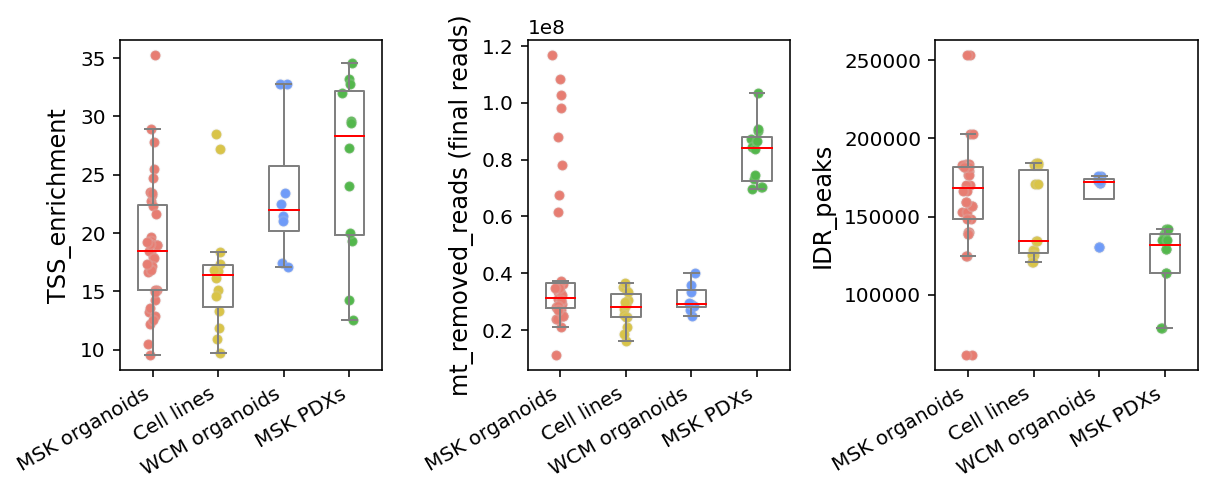

In [171]:
plt.figure(figsize=(8.5,3.5))

for j in range(0, len(['TSS_enrichment','mt_removed_reads (final reads)','IDR_peaks'])):
    ax = plt.subplot(1,3,j+1)
    
    sel_gene = ['TSS_enrichment','mt_removed_reads (final reads)','IDR_peaks'][j]
    
    msk_org_count = qc.loc[msk_org_sample, sel_gene]
    wcm_org_count = qc.loc[wcm_org_sample, sel_gene]
    cell_line_count = qc.loc[cell_line_sample, sel_gene]
    msk_pdx_count = qc.loc[msk_pdx_sample, sel_gene]

    for i,d in enumerate([msk_org_count,cell_line_count,wcm_org_count,msk_pdx_count]):
        y = d
        x = np.random.normal(i+1, 0.04, len(y))
        ax.plot(x, y, mfc = ["#E77D72",'#D9C448','#6F9BF8','#53B74C'][i], mec='#D3D3D330', ms=5, marker="o", linestyle="None")


    bx = ax.boxplot([msk_org_count,cell_line_count,wcm_org_count,msk_pdx_count], showfliers=True, flierprops={'marker':'None', 'color':'None'},
                    labels = ['MSK organoids','Cell lines','WCM organoids','MSK PDXs'])

    set_box_color(bx, 'grey')
    
    ax.set_ylabel(sel_gene, fontsize=12)
#     ylim_range = max(patient_ntpLabel.loc[:,sel_gene])-min(patient_ntpLabel.loc[:,sel_gene])
#     ax.set_ylim(min(patient_ntpLabel.loc[:,sel_gene])-ylim_range*0.1,max(patient_ntpLabel.loc[:,sel_gene])+ylim_range*0.4)
    ax.set_xticklabels(['MSK organoids','Cell lines','WCM organoids','MSK PDXs'], fontsize=10, rotation=30, ha='right')
    
    
plt.tight_layout()
plt.savefig('figure1/figure_s2cde.pdf')
plt.show();

In [7]:
qc_label = pd.read_csv('orgn_sampleList_wRep.txt', index_col=0, sep='\t', header=None)
qc_label = qc_label.loc[qc.index,]
qc_label.head(2)

,1,2,3,4,5,6
sample_name,,,,,,
22Rv1_rep1,22Rv1,old,orgn,AR_dependent,AR_dependent,Cell_lines
22Rv1_rep2,22Rv1,old,orgn,AR_dependent,AR_dependent,Cell_lines


In [25]:
ar_sample = qc_label[qc_label[5] == 'AR_dependent'].index
wnt_sample = qc_label[qc_label[5] == 'WNT'].index
ne_sample = qc_label[qc_label[5] == 'NEPC'].index
scl_sample = qc_label[qc_label[5] == 'SCL'].index

qc_uniq = qc.copy()
qc_uniq.index = qc_label.loc[qc.index,1]
qc_uniq = qc_uniq.loc[~qc_uniq.index.duplicated(keep='first')]

qc_label_uniq = qc_label.copy()
qc_label_uniq.index = qc_label[1]
qc_label_uniq = qc_label_uniq.loc[~qc_label_uniq.index.duplicated(keep='first')]

ar_sample = qc_label_uniq[qc_label_uniq[5] == 'AR_dependent'].index
wnt_sample = qc_label_uniq[qc_label_uniq[5] == 'WNT'].index
ne_sample = qc_label_uniq[qc_label_uniq[5] == 'NEPC'].index
scl_sample = qc_label_uniq[qc_label_uniq[5] == 'SCL'].index

ar_count = qc_uniq.loc[ar_sample, 'IDR_peaks']
wnt_count = qc_uniq.loc[wnt_sample, 'IDR_peaks']
nepc_count = qc_uniq.loc[ne_sample, 'IDR_peaks']
scl_count = qc_uniq.loc[scl_sample, 'IDR_peaks']

stats.ttest_ind(ar_count, wnt_count, alternative='two-sided')
stats.ttest_ind(ar_count, nepc_count, alternative='two-sided')
stats.ttest_ind(ar_count, scl_count, alternative='two-sided')
stats.ttest_ind(wnt_count, nepc_count, alternative='two-sided')
stats.ttest_ind(wnt_count, scl_count, alternative='two-sided')
stats.ttest_ind(nepc_count, scl_count, alternative='two-sided')

stats.mannwhitneyu(ar_count, wnt_count, alternative='two-sided')
stats.mannwhitneyu(ar_count, nepc_count, alternative='two-sided')
stats.mannwhitneyu(ar_count, scl_count, alternative='two-sided')
stats.mannwhitneyu(wnt_count, nepc_count, alternative='two-sided')
stats.mannwhitneyu(wnt_count, scl_count, alternative='two-sided')
stats.mannwhitneyu(nepc_count, scl_count, alternative='two-sided')

Ttest_indResult(statistic=-0.3918556432148335, pvalue=0.7010649115706294)

Ttest_indResult(statistic=0.5111595788906252, pvalue=0.6162203588485304)

Ttest_indResult(statistic=-1.3981475567884194, pvalue=0.1754070984115627)

Ttest_indResult(statistic=0.7325729333812488, pvalue=0.48472649094363285)

Ttest_indResult(statistic=-0.638066043123431, pvalue=0.5330514109340494)

Ttest_indResult(statistic=-1.4238778382465451, pvalue=0.1725781162749824)

MannwhitneyuResult(statistic=19.0, pvalue=0.5989010989010988)

MannwhitneyuResult(statistic=36.0, pvalue=1.0)

MannwhitneyuResult(statistic=46.0, pvalue=0.08664373365473696)

MannwhitneyuResult(statistic=15.0, pvalue=0.6095238095238095)

MannwhitneyuResult(statistic=14.0, pvalue=0.20168067226890757)

MannwhitneyuResult(statistic=17.0, pvalue=0.05771782397169394)

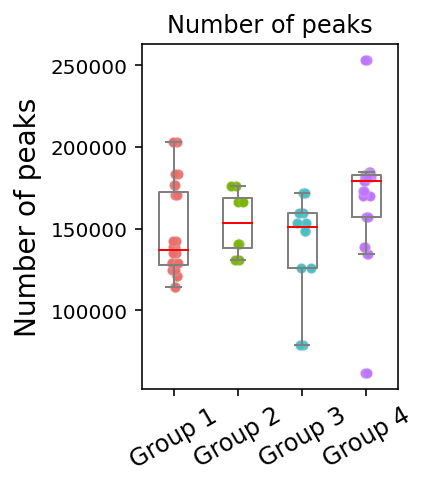

In [11]:
plt.figure(figsize=(3,3.5))

    
ar_count = qc.loc[ar_sample, 'IDR_peaks']
wnt_count = qc.loc[wnt_sample, 'IDR_peaks']
nepc_count = qc.loc[ne_sample, 'IDR_peaks']
scl_count = qc.loc[scl_sample, 'IDR_peaks']

for i,d in enumerate([ar_count, wnt_count, nepc_count, scl_count]):
    y = d
    x = np.random.normal(i+1, 0.04, len(y))
    plt.plot(x, y, mfc = ["#EB6E6A",'#7CB700','#4AC0C6','#BF75FF'][i], mec='#D3D3D330', ms=5, marker="o", linestyle="None")


bx = plt.boxplot([ar_count, wnt_count, nepc_count, scl_count], showfliers=True, flierprops={'marker':'None', 'color':'None'},
                labels = ['Group 1','Group 2','Group 3','Group 4'])

set_box_color(bx, 'grey')
    

plt.title('Number of peaks', fontsize=12)
plt.ylabel('Number of peaks', fontsize=14)
plt.xticks(fontsize=12, rotation=30)

plt.tight_layout()
# plt.savefig('figure1/figure_s2i.pdf')
plt.show();